<a href="https://colab.research.google.com/github/IvanKatorgin/Satistics-in-Python/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B2_Python_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Статистика в Python". Домашнее задание 1. Поиск аномалий в данных и работа с пропущенными значениями. Каторгин И.П.

Задание 1. Загрузка данных

Изучить представленный набор данных на основе описания его столбцов в файле “horse_data.names” , загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [ ]:
import pandas as pd, statistics as st

In [ ]:
with open("horse_data.names", "r", encoding = "utf-8") as hdm:
    hdm_ = hdm.read()
    print(hdm_)

1. TItle: Horse Colic database

2. Source Information
   -- Creators: Mary McLeish & Matt Cecile
	  	Department of Computer Science
		University of Guelph
		Guelph, Ontario, Canada N1G 2W1
		mdmcleish@water.waterloo.edu
   -- Donor:    Will Taylor (taylor@pluto.arc.nasa.gov)
   -- Date:     8/6/89

3. Past Usage:
   -- Unknown

4. Relevant Information:

   -- 2 data files
      -- horse-colic.data: 300 training instances
      -- horse-colic.test: 68 test instances
   -- Possible class attributes: 24 (whether lesion is surgical)
     -- others include: 23, 25, 26, and 27
   -- Many Data types: (continuous, discrete, and nominal)

5. Number of Instances: 368 (300 for training, 68 for testing)

6. Number of attributes: 28

7. Attribute Information:

  1:  surgery?
          1 = Yes, it had surgery
          2 = It was treated without surgery

  2:  Age
          1 = Adult horse
          2 = Young (< 6 months)

  3:  Hospital Number
          - numeric id
          - the case number assi

In [ ]:
horse_data = pd.read_csv('horse_data.csv', encoding = "utf-8", sep = ',', header = None, na_values = '?')
horse_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [ ]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       299 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       240 non-null    float64
 4   4       276 non-null    float64
 5   5       242 non-null    float64
 6   6       244 non-null    float64
 7   7       231 non-null    float64
 8   8       253 non-null    float64
 9   9       268 non-null    float64
 10  10      245 non-null    float64
 11  11      256 non-null    float64
 12  12      244 non-null    float64
 13  13      196 non-null    float64
 14  14      194 non-null    float64
 15  15      53 non-null     float64
 16  16      198 non-null    float64
 17  17      182 non-null    float64
 18  18      271 non-null    float64
 19  19      267 non-null    float64
 20  20      135 non-null    float64
 21  21      102 non-null    float64
 22  22

In [ ]:
horse_data = horse_data[[0, 1, 3, 4, 5, 6, 10, 22]]
horse_data

,0,1,3,4,5,6,10,22
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
horse_data.rename(columns = {0:'surgery?', 1:'Age', 3:'rectal temperature', 4:'pulse', 5:'respiratory rate', 6:'temperature of extremities', 10:'pain', 22:'outcome'}, inplace = True)
horse_data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [ ]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
horse_data[['rectal temperature', 'pulse', 'respiratory rate']].describe()

,rectal temperature,pulse,respiratory rate
count,240.000000,276.000000,242.000000
mean,38.167917,71.913043,30.417355
std,0.732289,28.630557,17.642231
min,35.400000,30.000000,8.000000
25%,37.800000,48.000000,18.500000
50%,38.200000,64.000000,24.500000
75%,38.500000,88.000000,36.000000
max,40.800000,184.000000,96.000000


In [ ]:
horse_data[['surgery?', 'Age', 'temperature of extremities', 'pain', 'outcome']].mode()

,surgery?,Age,temperature of extremities,pain,outcome
0,1.0,1,3.0,3.0,1.0


In [ ]:
horse_data[['surgery?', 'Age', 'temperature of extremities', 'pain', 'outcome']].value_counts()

surgery?  Age  temperature of extremities  pain  outcome
1.0       1    1.0                         3.0   1.0        13
2.0       1    1.0                         1.0   1.0        12
               2.0                         1.0   1.0        10
1.0       1    3.0                         5.0   2.0        10
2.0       1    1.0                         3.0   1.0        10
                                                            ..
1.0       1    3.0                         3.0   2.0         1
2.0       1    1.0                         2.0   3.0         1
1.0       1    2.0                         5.0   2.0         1
                                           3.0   2.0         1
2.0       9    2.0                         4.0   1.0         1
Name: count, Length: 75, dtype: int64

In [ ]:
print(horse_data['surgery?'].unique())
print(horse_data['Age'].unique())
print(horse_data['temperature of extremities'].unique())
print(horse_data['pain'].unique())
print(horse_data['outcome'].unique())

[ 2.  1. nan]
[1 9]
[ 3. nan  1.  4.  2.]
[ 5.  3.  2. nan  4.  1.]
[ 2.  3.  1. nan]


In [ ]:
# Столбец "Age": анализируя полученные данные и описание столбцов, значение '9' - выброс. В описании столбцов у "Age" имеются только 2 категории ('1' и '2'). Возможно, что значение '9' соответствует категории '2' описания столбцов. Заменяю все значения '9' на '2'

In [ ]:
horse_data['Age'].replace(9, 2, inplace=True)
horse_data.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
horse_data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


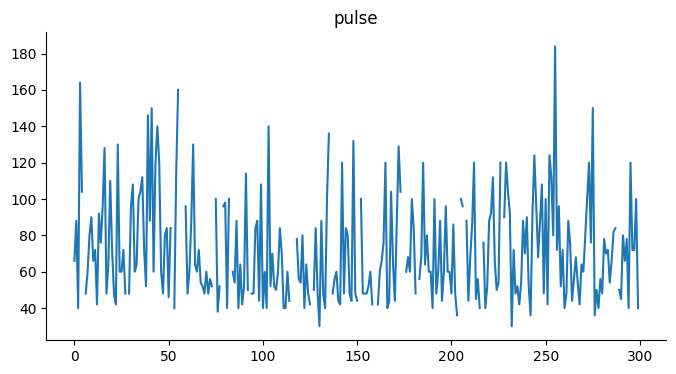

In [ ]:
# @title pulse

from matplotlib import pyplot as plt
horse_data['pulse'].plot(kind='line', figsize=(8, 4), title='pulse')
plt.gca().spines[['top', 'right']].set_visible(False)

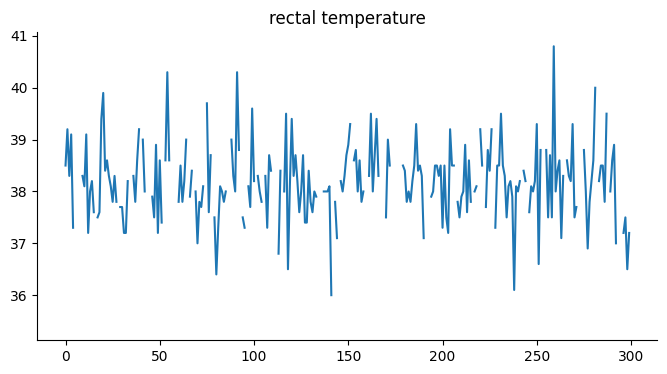

In [ ]:
# @title rectal temperature

from matplotlib import pyplot as plt
horse_data['rectal temperature'].plot(kind='line', figsize=(8, 4), title='rectal temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

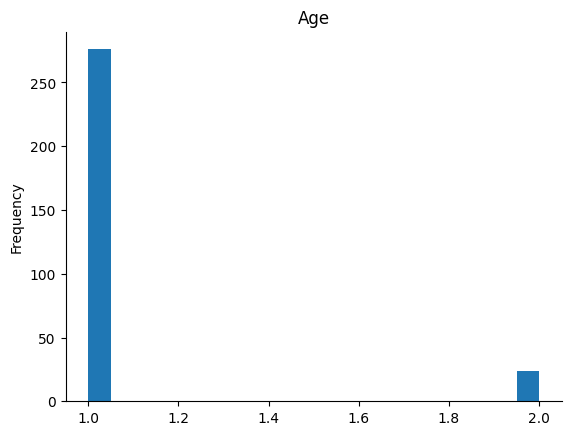

In [ ]:
# @title Age

from matplotlib import pyplot as plt
horse_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

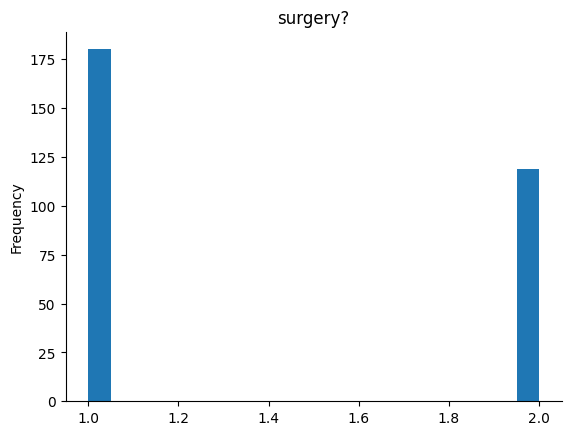

In [ ]:
# @title surgery?

from matplotlib import pyplot as plt
horse_data['surgery?'].plot(kind='hist', bins=20, title='surgery?')
plt.gca().spines[['top', 'right',]].set_visible(False)

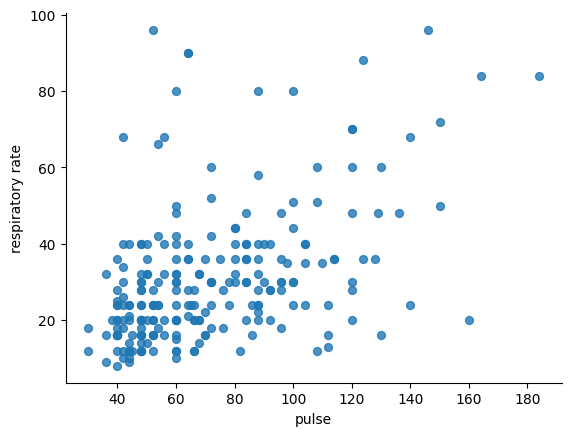

In [ ]:
# @title pulse vs respiratory rate

from matplotlib import pyplot as plt
horse_data.plot(kind='scatter', x='pulse', y='respiratory rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

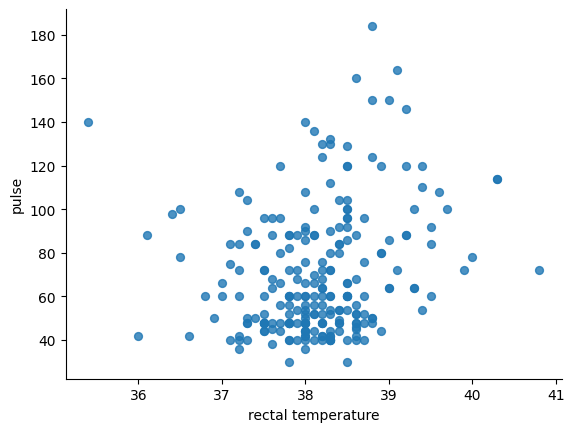

In [ ]:
# @title rectal temperature vs pulse

from matplotlib import pyplot as plt
horse_data.plot(kind='scatter', x='rectal temperature', y='pulse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

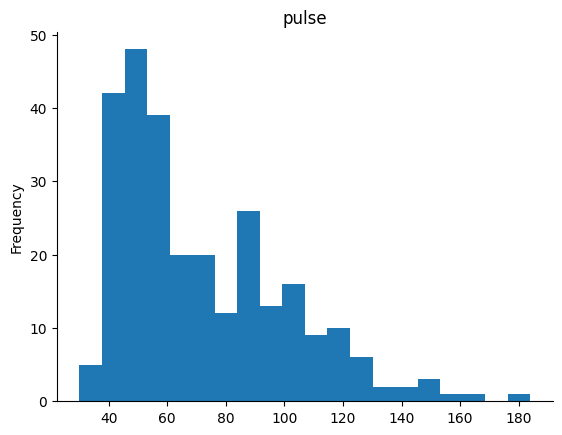

In [ ]:
# @title pulse

from matplotlib import pyplot as plt
horse_data['pulse'].plot(kind='hist', bins=20, title='pulse')
plt.gca().spines[['top', 'right',]].set_visible(False)

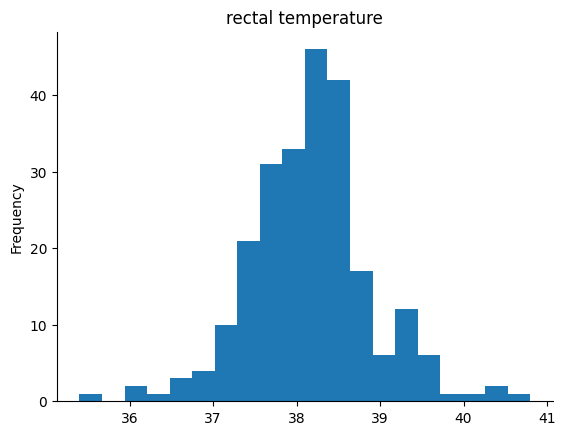

In [ ]:
# @title rectal temperature

from matplotlib import pyplot as plt
horse_data['rectal temperature'].plot(kind='hist', bins=20, title='rectal temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

Основные выводы:

1. Столбец "pulse" - распределение подчиняется логнормальному закону распределения

2. Столбекц "rectal temperature" - распределение подчиняется нормальному закону с модальным значением согласно графика - 38.2

3. В столбце "Age" был обнаружен выбос данных - 9, тогда как в файле описания в данном столбце могут быть только два значения - 1 и 2. Возможно это была случайная ошибка и принято решение заменить значение 9 на значение 2

4. В столбцах "pulse" и "rectal temperature" явных выбросов не наблюдается, что наглядно представлено на одноименных графиках

5. На графике "pulse vs respiratory rate" наблюдается прямая корреляция между pulse и respiratory rate. Согласно графика можно выдвинуть гипотезу, что с уверичением respiratory rate увеличивается pulse. Данную гипотезу можно проверить в дальнейших исследованиях

6. На графике "rectal temperature vs pulse" не наблюдается явная закономерность между rectal temperature и pulse. Но, несмотря на отсутствие явной корреляции, можно выдвинуть гипотезу, что с уверичением pulse увеличивается rectal temperature. Данную гипотезу можно проверить в дальнейших исследованиях



Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
(horse_data.isna().mean() * 100).round(2)

surgery?                       0.33
Age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

In [ ]:
# пропусков нет только в столбце "Age", в остальных имеются пропуски

In [ ]:
print(horse_data['surgery?'].mean())
print(horse_data['surgery?'].median())
print(horse_data['surgery?'].mode()[0])
print(horse_data['surgery?'].std())
print(horse_data['surgery?'].var())

1.3979933110367893
1.0
1.0
0.4903046443288189
0.24039864425040958


In [ ]:
# пропуски в столбце "surgery?" заполняем медианными значениями

In [ ]:
horse_data['surgery?'] = horse_data['surgery?'].fillna(horse_data['surgery?'].mode()[0])

In [ ]:
print(horse_data['surgery?'].mean())
print(horse_data['surgery?'].median())
print(horse_data['surgery?'].mode()[0])
print(horse_data['surgery?'].std())
print(horse_data['surgery?'].var())

1.3966666666666667
1.0
1.0
0.49002309230504254
0.24012263099219625


In [ ]:
# средние значения практически не изменились

In [ ]:
print(horse_data['rectal temperature'].mean())
print(horse_data['rectal temperature'].median())
print(horse_data['rectal temperature'].mode()[0])
print(horse_data['rectal temperature'].std())
print(horse_data['rectal temperature'].var())

38.16791666666667
38.2
38.0
0.7322886641121578
0.5362466875871686


In [ ]:
# пропуски в столбце "rectal temperature" заполняем модальными значениями

In [ ]:
horse_data['rectal temperature'] = horse_data['rectal temperature'].fillna(horse_data['rectal temperature'].median())

In [ ]:
print(horse_data['rectal temperature'].mean())
print(horse_data['rectal temperature'].median())
print(horse_data['rectal temperature'].mode()[0])
print(horse_data['rectal temperature'].std())
print(horse_data['rectal temperature'].var())

38.17433333333333
38.2
38.2
0.6548312010703263
0.4288039018952062


In [ ]:
# средние значения незначительно изменились (не критично)

In [ ]:
print(horse_data['pulse'].mean())
print(horse_data['pulse'].median())
print(horse_data['pulse'].mode()[0])
print(horse_data['pulse'].std())
print(horse_data['pulse'].var())

71.91304347826087
64.0
48.0
28.630556660735
819.7087747035573


In [ ]:
# пропуски в столбце "pulse" заполняем медианными значениями

In [ ]:
horse_data['pulse'] = horse_data['pulse'].fillna(horse_data['pulse'].median())

In [ ]:
print(horse_data['pulse'].mean())
print(horse_data['pulse'].median())
print(horse_data['pulse'].mode()[0])
print(horse_data['pulse'].std())
print(horse_data['pulse'].var())

71.28
64.0
64.0
27.541545388885254
758.5367224080267


In [ ]:
# средние значения незначительно изменились (не критично)

In [ ]:
print(horse_data['respiratory rate'].mean())
print(horse_data['respiratory rate'].median())
print(horse_data['respiratory rate'].mode()[0])
print(horse_data['respiratory rate'].std())
print(horse_data['respiratory rate'].var())

30.417355371900825
24.5
20.0
17.64223138513467
311.2483282466308


In [ ]:
# пропуски в столбце "respiratory rate" заполняем медианными значениями

In [ ]:
horse_data['respiratory rate'] = horse_data['respiratory rate'].fillna(horse_data['respiratory rate'].median())

In [ ]:
print(horse_data['respiratory rate'].mean())
print(horse_data['respiratory rate'].median())
print(horse_data['respiratory rate'].mode()[0])
print(horse_data['respiratory rate'].std())
print(horse_data['respiratory rate'].var())

29.273333333333333
24.5
24.5
16.010979371157603
256.35146042363436


In [ ]:
# средние значения незначительно изменились (не критично)

In [ ]:
print(horse_data['temperature of extremities'].mean())
print(horse_data['temperature of extremities'].median())
print(horse_data['temperature of extremities'].mode()[0])
print(horse_data['temperature of extremities'].std())
print(horse_data['temperature of extremities'].var())

2.348360655737705
3.0
3.0
1.0450536920112763
1.0921372191863994


In [ ]:
# пропуски в столбце "temperature of extremities" заполняем медианными значениями

In [ ]:
horse_data['temperature of extremities'] = horse_data['temperature of extremities'].fillna(horse_data['temperature of extremities'].mode()[0])

In [ ]:
print(horse_data['temperature of extremities'].mean())
print(horse_data['temperature of extremities'].median())
print(horse_data['temperature of extremities'].mode()[0])
print(horse_data['temperature of extremities'].std())
print(horse_data['temperature of extremities'].var())

2.47
3.0
3.0
0.975845401429775
0.9522742474916388


In [ ]:
# средние значения незначительно изменились (не критично)

In [ ]:
print(horse_data['pain'].mean())
print(horse_data['pain'].median())
print(horse_data['pain'].mode()[0])
print(horse_data['pain'].std())
print(horse_data['pain'].var())

2.951020408163265
3.0
3.0
1.3079395711243496
1.7107059217129477


In [ ]:
# пропуски в столбце "pain" заполняем медианными значениями

In [ ]:
horse_data['pain'] = horse_data['pain'].fillna(horse_data['pain'].mode()[0])

In [ ]:
print(horse_data['pain'].mean())
print(horse_data['pain'].median())
print(horse_data['pain'].mode()[0])
print(horse_data['pain'].std())
print(horse_data['pain'].var())

2.96
3.0
3.0
1.1816886052874593
1.3963879598662208


In [ ]:
# средние значения незначительно изменились (не критично)

In [ ]:
print(horse_data['outcome'].mean())
print(horse_data['outcome'].median())
print(horse_data['outcome'].mode()[0])
print(horse_data['outcome'].std())
print(horse_data['outcome'].var())

1.5518394648829432
1.0
1.0
0.7371869448054943
0.5434445915916589


In [ ]:
# пропуски в столбце "outcome" заполняем медианными значениями

In [ ]:
horse_data['outcome'] = horse_data['outcome'].fillna(horse_data['outcome'].mode()[0])

In [ ]:
print(horse_data['outcome'].mean())
print(horse_data['outcome'].median())
print(horse_data['outcome'].mode()[0])
print(horse_data['outcome'].std())
print(horse_data['outcome'].var())

1.55
1.0
1.0
0.7366424780503955
0.5426421404682275


In [ ]:
# средние значения незначительно изменились (не критично)

In [ ]:
horse_data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.2,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


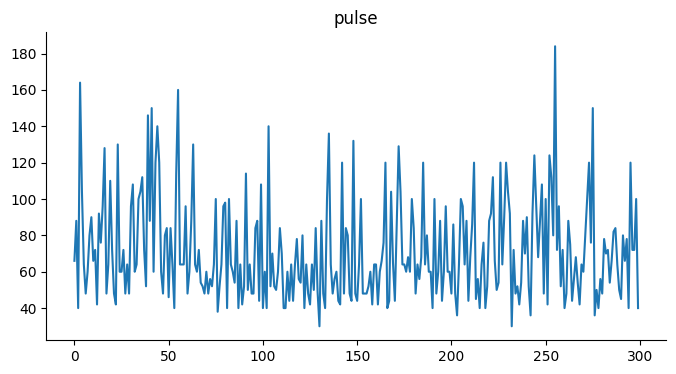

In [ ]:
# @title pulse

from matplotlib import pyplot as plt
horse_data['pulse'].plot(kind='line', figsize=(8, 4), title='pulse')
plt.gca().spines[['top', 'right']].set_visible(False)

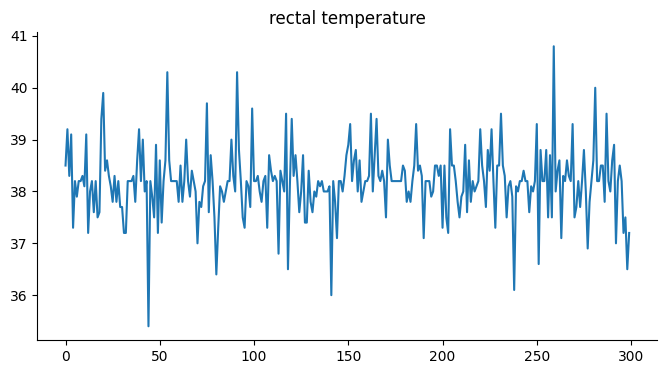

In [ ]:
# @title rectal temperature

from matplotlib import pyplot as plt
horse_data['rectal temperature'].plot(kind='line', figsize=(8, 4), title='rectal temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

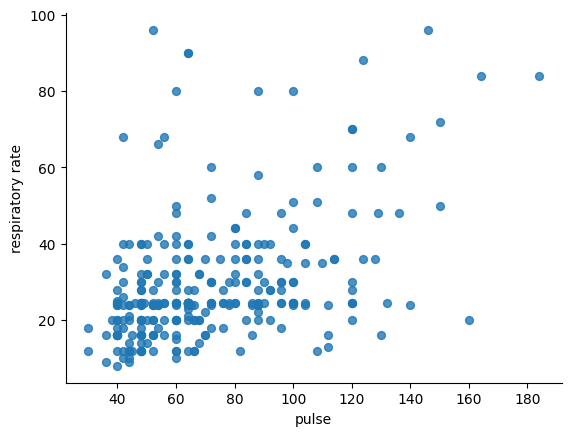

In [ ]:
# @title pulse vs respiratory rate

from matplotlib import pyplot as plt
horse_data.plot(kind='scatter', x='pulse', y='respiratory rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

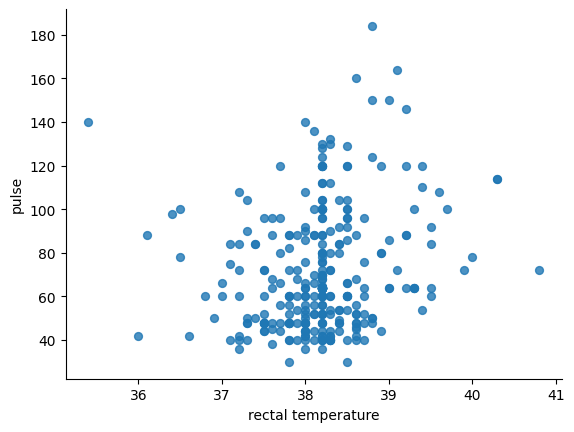

In [ ]:
# @title rectal temperature vs pulse

from matplotlib import pyplot as plt
horse_data.plot(kind='scatter', x='rectal temperature', y='pulse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

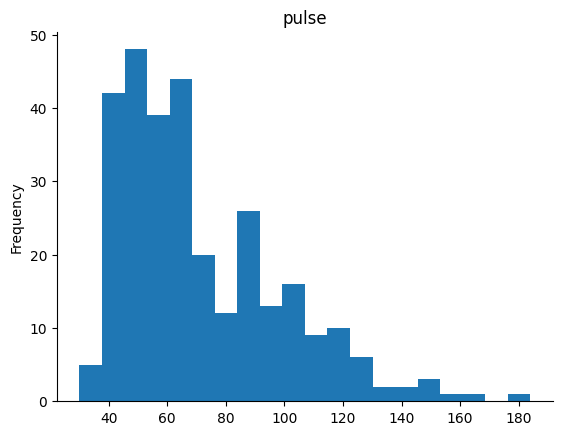

In [ ]:
# @title pulse

from matplotlib import pyplot as plt
horse_data['pulse'].plot(kind='hist', bins=20, title='pulse')
plt.gca().spines[['top', 'right',]].set_visible(False)

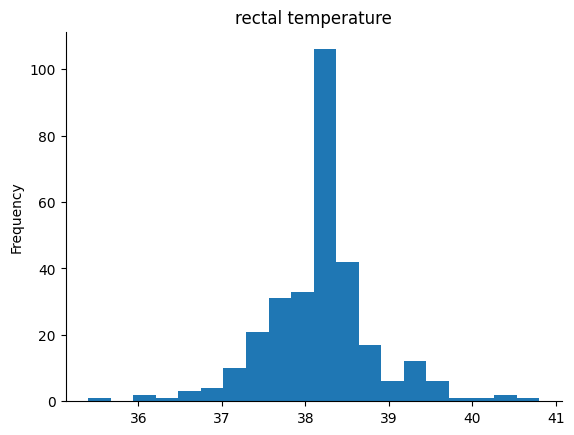

In [ ]:
# @title rectal temperature

from matplotlib import pyplot as plt
horse_data['rectal temperature'].plot(kind='hist', bins=20, title='rectal temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

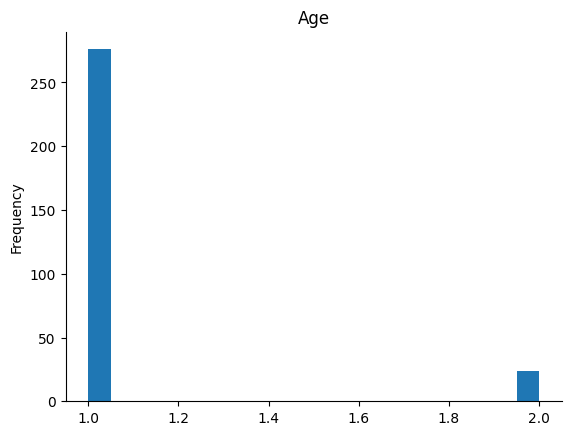

In [ ]:
# @title Age

from matplotlib import pyplot as plt
horse_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

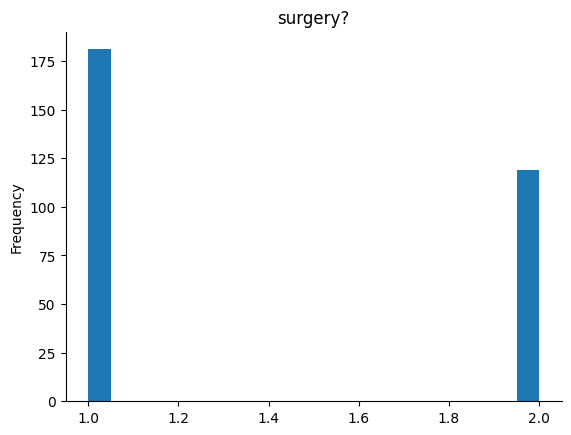

In [ ]:
# @title surgery?

from matplotlib import pyplot as plt
horse_data['surgery?'].plot(kind='hist', bins=20, title='surgery?')
plt.gca().spines[['top', 'right',]].set_visible(False)